In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
#Data generation

#criação de dados falsos com relação linear
#na vida real, pegam-se os dados de uma fonte externa
observations = 100 #tamanho da dataset que queremos criar

#modelo linear de 2 variaveis f(x,z) = ax + bz + c
#np.random.uniform(low,high,size), pega um valor randomico entre low e high onde cada numero tem uma chance igual de aparecer
#size = (numero de observaçoes x numero de variaveis)
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

#np.colunm_stack(appropriate tuples) pega uma sequencia de arrays de 1 dimensão  e cocatena em um array de 2 dimensões
generated_inputs = np.column_stack((xs,zs))

In [3]:
#create target we will aim on

# targets = f(x,z) = 2*x - 3*z + 5 +ruído
noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

In [4]:
'''TensorFlow gosta de trabalhar com tensores(duuhr) para isso é interessante que os dados que irão ser apresentados sejam 
dados por um numPy file(.npz) que armazenam arrays n-dimensionais. '''
#normalmente há um preprocessamento dos dados para que antes de treinar a rede os dados estejam em .npz

#np.savez(file name, arrays)
np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

### solving with tf2

In [5]:
training_data = np.load('TF_intro.npz')

In [8]:
input_size =2
output_size =1

#actually building the model
#tf.keras.layers.Dense(numeroOutputs) pega inputs e calcula o produto matricial, adicionando o bias E opcinalmente, aplicando a função de ativação
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)    
                            ])
#model.compile() método onde se define o otimizador e a função custo
model.compile(optimizer='sgd',loss='mean_squared_error')

#model.fit(): onde se define quais são os dados de entrada, os dados esperados de saída e o numero de iteraçoes(épocas)
'''verbose: mostra se o treinamento será exibido ou nao em forma de texto
0 = não mostra nada
1 = mostra uma barra de progresso e a loss
2 = mostra 1 linha por época'''
model.fit(training_data['inputs'],training_data['targets'],epochs = 100, verbose=0)



### Extract weights and bias

In [10]:
#model.layers[0].get_weights(): pega os pesos de uma camada(layer) específica
model.layers[0].get_weights()

[array([[ 2.026966 ],
        [-3.0184302]], dtype=float32), array([4.9815035], dtype=float32)]

### Extract the outputs (make predictions)

In [11]:
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[ 12.798756  ],
       [ 13.978547  ],
       [ -3.8026419 ],
       [-14.96918   ],
       [ -1.6818156 ],
       [ -5.520817  ],
       [-25.664322  ],
       [ -1.1257868 ],
       [ 39.58964   ],
       [ 15.825017  ],
       [-32.652554  ],
       [  2.5147276 ],
       [-31.8708    ],
       [  6.9107733 ],
       [ -9.518482  ],
       [ 37.168     ],
       [ -7.414608  ],
       [ 40.60785   ],
       [ 25.129917  ],
       [ 25.951794  ],
       [  9.3519535 ],
       [ 32.169167  ],
       [ -7.3226156 ],
       [  9.370897  ],
       [ -9.3320265 ],
       [  1.5230999 ],
       [ 31.116714  ],
       [ -4.1187944 ],
       [-26.832737  ],
       [ -9.49297   ],
       [ -4.1982985 ],
       [  8.918528  ],
       [ 40.38584   ],
       [-13.630103  ],
       [-16.443272  ],
       [ -7.056123  ],
       [-18.142849  ],
       [-15.768743  ],
       [ 19.729717  ],
       [ 46.94199   ],
       [  0.8428545 ],
      

In [15]:
training_data['targets'].round(3)

array([[ 12.509],
       [ 13.825],
       [ -3.003],
       [-14.55 ],
       [ -1.232],
       [ -6.085],
       [-26.079],
       [ -0.879],
       [ 40.055],
       [ 16.632],
       [-32.213],
       [  2.34 ],
       [-31.539],
       [  7.186],
       [ -9.361],
       [ 37.381],
       [ -6.804],
       [ 41.062],
       [ 25.339],
       [ 24.973],
       [  9.312],
       [ 32.987],
       [ -6.869],
       [  8.311],
       [ -9.164],
       [  1.895],
       [ 31.518],
       [ -4.029],
       [-25.868],
       [-10.028],
       [ -4.487],
       [  9.364],
       [ 40.201],
       [-13.878],
       [-16.995],
       [ -7.063],
       [-18.396],
       [-16.066],
       [ 20.029],
       [ 46.334],
       [  1.448],
       [-16.518],
       [ 48.963],
       [ 53.513],
       [-20.491],
       [ -7.443],
       [ 15.33 ],
       [ 32.448],
       [-11.432],
       [ 15.986],
       [-22.108],
       [ -7.028],
       [ 31.345],
       [-21.469],
       [  3.522],
       [ -

### Plotting the Data

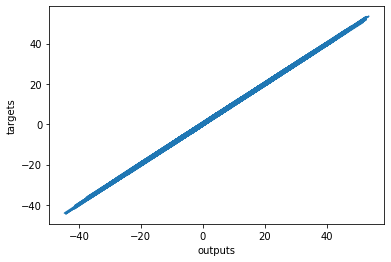

In [13]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()